In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [27]:
# Load the dataset with correct encoding
data = pd.read_csv("Mobiles.csv", encoding="latin1")

print("Dataset loaded successfully")
print(data.head())

Dataset loaded successfully
  Company Name            Model Name Mobile Weight  RAM Front Camera  \
0        Apple       iPhone 16 128GB          174g  6GB         12MP   
1        Apple       iPhone 16 256GB          174g  6GB         12MP   
2        Apple       iPhone 16 512GB          174g  6GB         12MP   
3        Apple  iPhone 16 Plus 128GB          203g  6GB         12MP   
4        Apple  iPhone 16 Plus 256GB          203g  6GB         12MP   

  Back Camera   Processor Battery Capacity Screen Size  \
0        48MP  A17 Bionic         3,600mAh  6.1 inches   
1        48MP  A17 Bionic         3,600mAh  6.1 inches   
2        48MP  A17 Bionic         3,600mAh  6.1 inches   
3        48MP  A17 Bionic         4,200mAh  6.7 inches   
4        48MP  A17 Bionic         4,200mAh  6.7 inches   

  Launched Price (Pakistan) Launched Price (India) Launched Price (China)  \
0               PKR 224,999             INR 79,999              CNY 5,799   
1               PKR 234,999         

In [28]:
# Handle Missing Values (if any)
# ----------------------------------
data = data.dropna()

In [29]:
# Encode Categorical Columns
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

In [30]:
 #Define Features and Target
# (Assuming LAST column is the target)
# ----------------------------------
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [31]:
# Train-Test Split
# ----------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [32]:
# Create Decision Tree Model
# ----------------------------------
model = DecisionTreeClassifier(
    criterion="gini",     # or "entropy"
    max_depth=5,
    random_state=42
)

In [33]:
# Train the Model
# ----------------------------------
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [34]:
# Make Predictions
# ----------------------------------
y_pred = model.predict(X_test)

In [35]:
# Evaluate the Model
# ----------------------------------
print("\nAccuracy:", accuracy_score(y_test, y_pred))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0))


Accuracy: 0.478494623655914

Confusion Matrix:

[[ 0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  1  0]
 [ 0  0  0  1  0  0  0  0  4  0]
 [ 0  0  0  4  5  0  2  0  0  0]
 [ 0  0  0  7  8  0  2  0  0  0]
 [ 0  0  0  3  1  3  8  0  3  0]
 [ 0  0  0  1  0  0 17  1  9  0]
 [ 0  0  0  0  0  0 10  4 17  0]
 [ 0  0  0  1  1  0 15  1 52  0]
 [ 0  0  0  0  0  0  0  0  2  1]]

Classification Report:

              precision    recall  f1-score   support

        2016       0.00      0.00      0.00         1
        2017       0.00      0.00      0.00         2
        2018       0.00      0.00      0.00         5
        2019       0.22      0.36      0.28        11
        2020       0.50      0.47      0.48        17
        2021       1.00      0.17      0.29        18
        2022       0.31      0.61      0.41        28
        2023       0.67      0.13      0.22        31
        2024       0.59      0.74      0.66        70
        2025       1.00      0.33      0.50         3


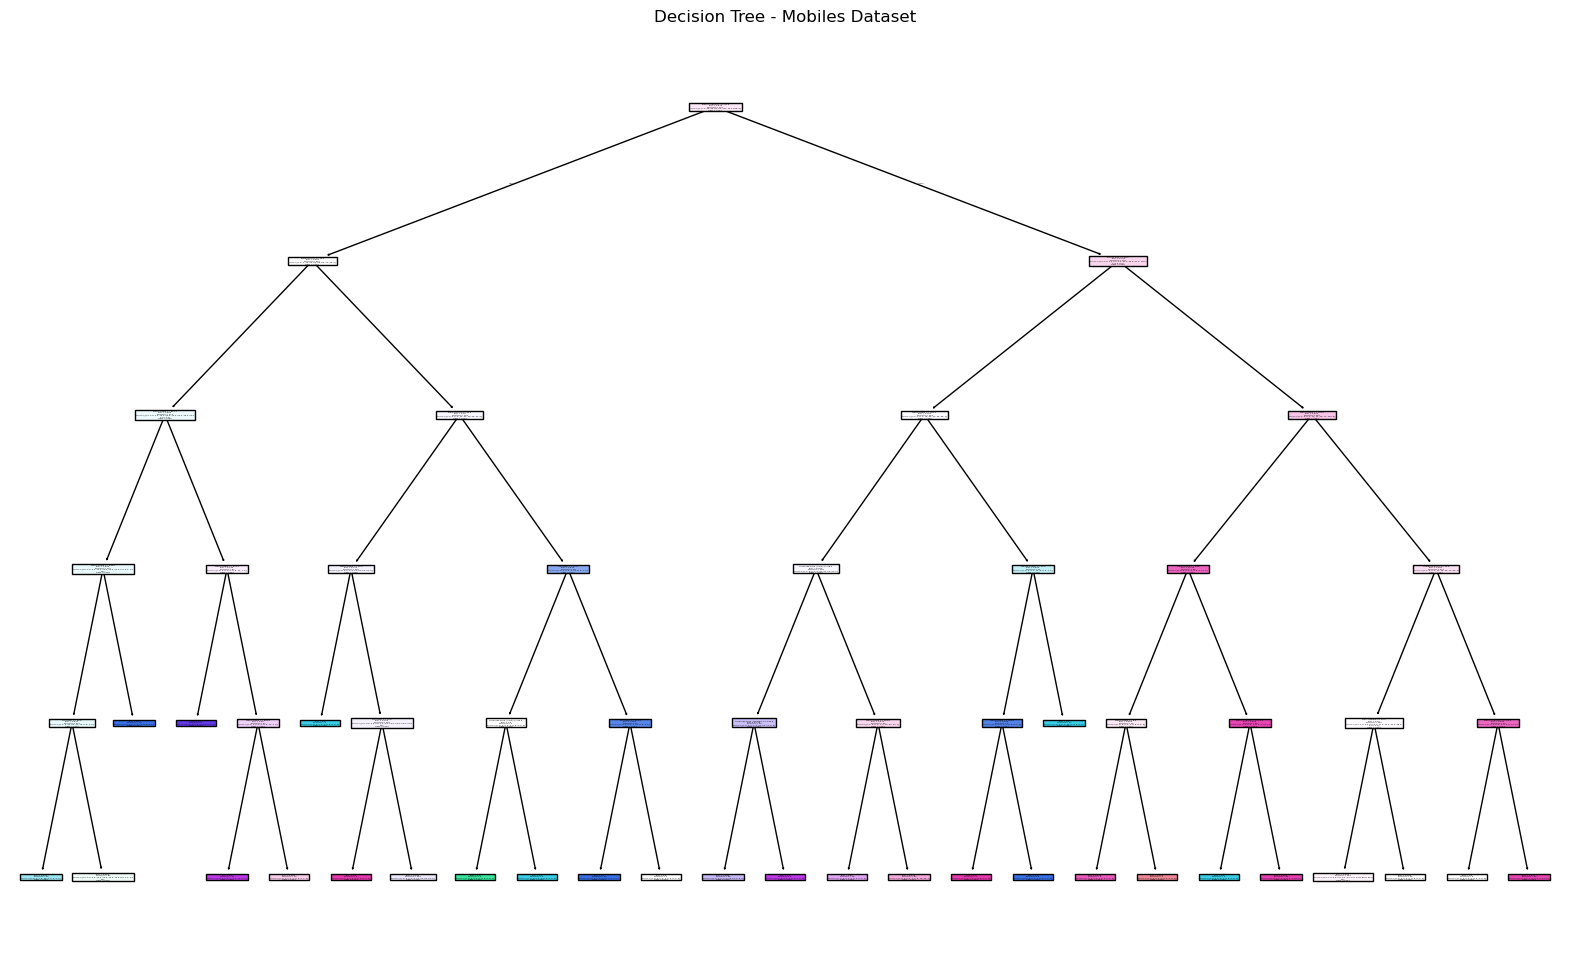

In [36]:
# Visualize the Decision Tree
# ----------------------------------
plt.figure(figsize=(20, 12))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=[str(c) for c in np.unique(y)],
    filled=True
)
plt.title("Decision Tree - Mobiles Dataset")
plt.show()